In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
from datetime import datetime
from bs4 import BeautifulSoup
import requests
import string
from concurrent.futures import ThreadPoolExecutor, wait
from random import uniform
import random
import pickle
from sklearn.preprocessing import OneHotEncoder
import os
from sklearn.preprocessing import MultiLabelBinarizer
from copy import deepcopy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from keras.models import load_model
import warnings

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D
from keras import regularizers
from random import sample
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore")

In [3]:
with open('all_genres_df.pkl', 'rb') as f: 
    films = pickle.load(f)

In [18]:
import visualkeras
from keras import layers, models

In [30]:
pca_ss_model = models.Sequential()
pca_ss_model.add(layers.Conv1D(filters = 20, kernel_size = (3), activation = 'relu', input_shape = (2200,1), 
                      padding = 'causal', kernel_initializer = 'normal'))
pca_ss_model.add(layers.MaxPooling1D(pool_size = (2)))
pca_ss_model.add(layers.Dropout(0.3))

pca_ss_model.add(layers.Conv1D(filters = 10, kernel_size = (3), activation = 'tanh', padding = 'causal'))
pca_ss_model.add(layers.MaxPooling1D(pool_size = (2)))
pca_ss_model.add(layers.Dropout(0.3))

pca_ss_model.add(layers.Flatten())

pca_ss_model.add(layers.Dense(128, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(100, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(64, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(45, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(32, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(16, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(8, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
#pca_ss_model.add(layers.Dense(1, kernel_initializer = 'normal'))


In [26]:
pca_ss_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 2200, 20)          80        
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1100, 20)         0         
 1D)                                                             
                                                                 
 dropout_20 (Dropout)        (None, 1100, 20)          0         
                                                                 
 conv1d_7 (Conv1D)           (None, 1100, 10)          610       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 550, 10)          0         
 1D)                                                             
                                                                 
 dropout_21 (Dropout)        (None, 550, 10)          

In [ ]:
pca_ss_model.add(layers.Flatten())

pca_ss_model.add(layers.Dense(128, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(100, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(64, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(45, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(32, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(16, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))
pca_ss_model.add(layers.Dense(8, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
pca_ss_model.add(layers.Dropout(0.3))

In [83]:
model = models.Sequential()
model.add(layers.Conv2D(20, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))



model.add(layers.Conv2D(10, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())


model.add(layers.Dense(100, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(45, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8, activation = 'relu', kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.005)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))

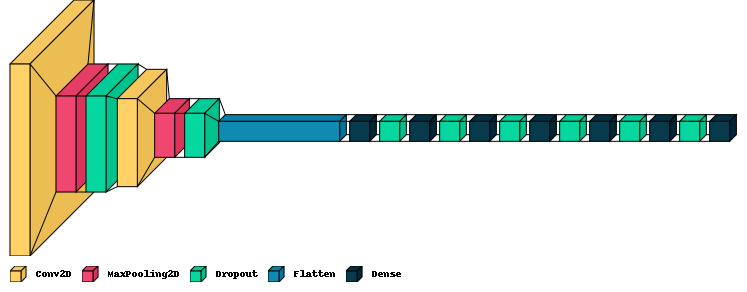

In [84]:
from PIL import ImageFont
visualkeras.layered_view(model, legend=True) 

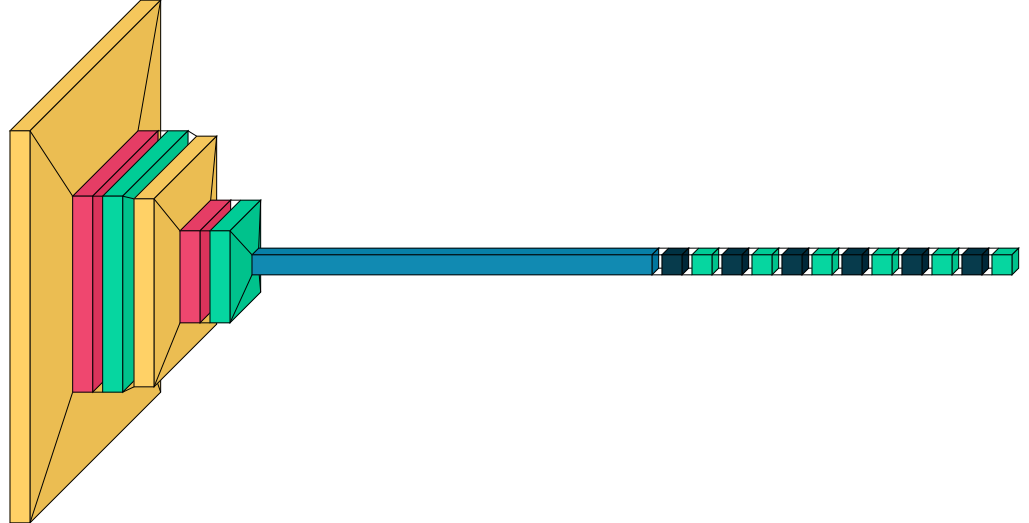

In [77]:
visualkeras.layered_view(model)

In [ ]:
pca_ss_model.add(layers.Conv1D(filters = 20, kernel_size = (3), activation = 'relu', input_shape = (2200,1), 
                      padding = 'causal', kernel_initializer = 'normal'))
pca_ss_model.add(layers.MaxPooling1D(pool_size = (2)))
pca_ss_model.add(layers.Dropout(0.3))

pca_ss_model.add(layers.Conv1D(filters = 10, kernel_size = (3), activation = 'tanh', padding = 'causal'))
pca_ss_model.add(layers.MaxPooling1D(pool_size = (2)))
pca_ss_model.add(layers.Dropout(0.3))


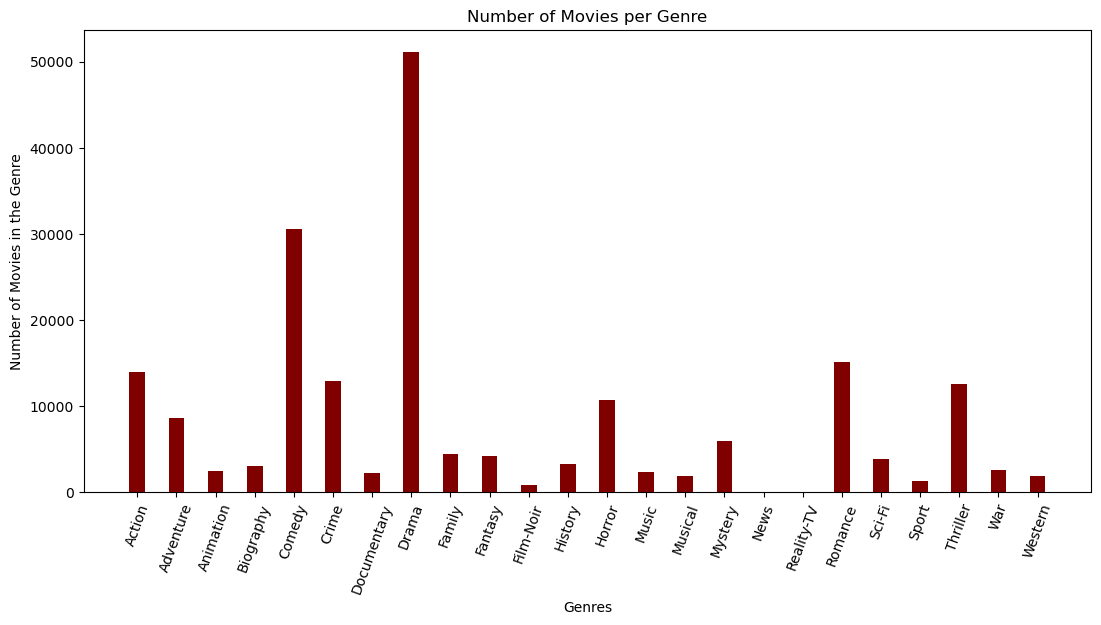

In [4]:
tdf = deepcopy(films)
mlb = MultiLabelBinarizer(sparse_output=True)
tdf = tdf.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(tdf.pop('genres')), index = tdf.index, columns = mlb.classes_))
l1 = list(mlb.classes_)
l2 = []
for g in l1:
    l2.append(len(tdf[tdf[g] == 1]))
    
fig = plt.figure(figsize = (13, 6))
 
# creating the bar plot
plt.bar(l1, l2, color ='maroon',
        width = 0.4)
 
plt.xlabel("Genres")
plt.ylabel("Number of Movies in the Genre")
plt.title("Number of Movies per Genre")
plt.xticks(rotation = 70)
plt.show()

In [8]:
l2[15:]

[5993, 59, 4, 15073, 3901, 1266, 12553, 2612, 1924]